# Homework 2

## Introduction

### Important dates

* Homework release: Thursday, 7th November 2019
* **Homework due: Wednesday, 20th November 2019 (23:59 hours, 11:59 PM)**
* **Peer review due: Wednesday, 27th November 2019 (23:59 hours, 11:59 PM)**
* Grading release: Monday, 9th December 2019

Finally, we are going to plot the mean message length made in each subreddit with their corresponding 99% confidence intervals.

To do so, we assume the mean message length can be modeled with a normal distrubtion. 

In order to calculate the parameters, we use a non-parametric approach. We sample the dataset with replacement k times, compute the mean for each time and then use the mean 0.005 quantile and the 0.995 quantiles. The difference of these quantiles with the mean create the 99% confidence intervals for each subreddit.  

**Some rules:**
* You are allowed to use any built-in Python library that comes with Anaconda. You should make heavy use of `sklearn`, which will save you from (re)implementing any of the classical machine learning algorithms yourself. If you want to use an external library, you have to justify your choice.
* Make sure you use the data folder provided in the repository in read-only mode.
* Be sure to provide textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
* Back up any hypotheses and claims with data, since this is an important aspect of the course.
* Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.
* Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
* **Important Note:** Owing to the scale of the datasets some tasks might take longer to finish, and hence, it is *recommended* that you start working on this homework as early as possible.

# Task A: Applied ML and Reading the Stats

## Description

You have been appointed as the manager/head-coach of Lausanne's men's football team [FC Lausanne-Sport](https://en.wikipedia.org/wiki/FC_Lausanne-Sport), and as a first step towards improving the team you decide to hire a new player. One way to assess the quality of a player would be to watch the games in which he participates. Since there are 22 players on the field, he will typically only have the ball for around 5-10 minutes per game. In addition, the ADA homework takes up all your free time, and hence, you need a more efficient and elegant solution.

You hypothesize that perhaps looking at the *physical capabilities* of the candidates such as *'running'* and *'jumping'* might be a good enough proxy for their skill as a football player. Thus, you come up with the idea of letting candidate players do just a couple of exercises such as *'100m sprint'* and *'high jump'*, and decide on one of the candidates based on his performance in these exercises. Because you are an aspiring data scientist, you want to use machine learning to optimize the player selection.

You come across a dataset of players from the football video game [FIFA 19](https://www.ea.com/games/fifa/fifa-19), which contains hand-annotated data about thousands of real-world football players, in particular about their skills in different domains.
Each row of the dataset corresponds to a player (you might recognize some of them). It contains information such as the player's nationality and their market value. However, the attributes that we are interested in are the skills of the players in various footballing aspects such as *'agility'*, *'dribbling'*, or *'heading accuracy'*. Apart from one attribute (see **A2.1.**), all of them are *non-negative* values in different bounded ranges, where a *higher value* corresponds to the *player being better* in that skill.

### A1. Getting a sense of the data

#### A1.1.
Load the data present at `data/fifa19_players.csv` into a Pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import warnings
import pickle
import seaborn as sns
#from tqdm import tqdm
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
fifa19_df = pd.read_csv('data/fifa19_players.csv', delimiter=',')
fifa19_df.tail()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18154,18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18155,18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18156,18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18157,18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18158,18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


#### A1.2.
The column *'Overall'* contains a score representing the overall performance of a football player. Before you start, you want to make sure that there is enough diversity in the dataset to draw meaningful conclusions (e.g. it shouldn't be the case that all players come roughly from the same skill class).
* First, think about what kind of distribution you would expect for the overall scores.
* Moving ahead, plot a histogram of the scores with *30 equal-width bins* and analyze the plot. Is this the distribution that you had expected?

As we are talking about a distribution of averages (as the *overall* performance of a player is their average performance across several different skills), we would expect a distribution that at least tends towards a **normal distribution** as the number of players increases. (A result directly derived from the Central Limit Theorem.)

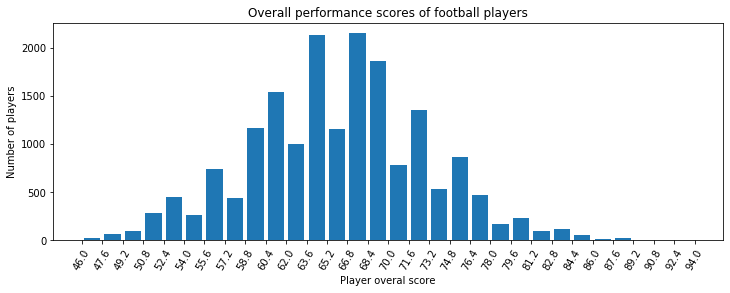

In [3]:
BIN_NUMBER = 30

# create bins
bin_width = (max(fifa19_df['Overall']) - min(fifa19_df['Overall']))/BIN_NUMBER
bin_limits = np.arange(min(fifa19_df['Overall']), max(fifa19_df['Overall']) + bin_width, bin_width)

# plot the histogram
plt.figure(figsize=(12,4))
plt.hist(fifa19_df['Overall'], bins=bin_limits, rwidth=0.8)
plt.xlabel('Player overal score')
plt.ylabel('Number of players')
plt.title('Overall performance scores of football players')
plt.xticks(bin_limits, rotation=60)
plt.show()

#### A1.3.
If you observe differences from what you expected in **A1.2.**, they might be due to a misrepresentation by the plot. Carefully study the actual values in the *'Overall'* column and **fix** the histogram accordingly! Redo the plot of step A1.2., and briefly state your observations.

Several columns appear to be at half the expected height. However, it should be noted that the *overall* player performance is described using **only integers** - leading some columns to have only 1 acceptable integer value while the next typically contains 2, thus creating this discrepancy. 

<br>

<div style="margin-left:5%"><em>One example is the bin \[65.2, 66.8[, which only accepts the integer value 66, and the bin that follows it, \[66.8, 68.4\[, which takes both the values 67 and 68. This explains why some columns look like they are at half their expected height (or, equivalently, the other seems to be twice as tall as would be expectable).</em></div>

As such, to solve this we must **adjust our bins**.

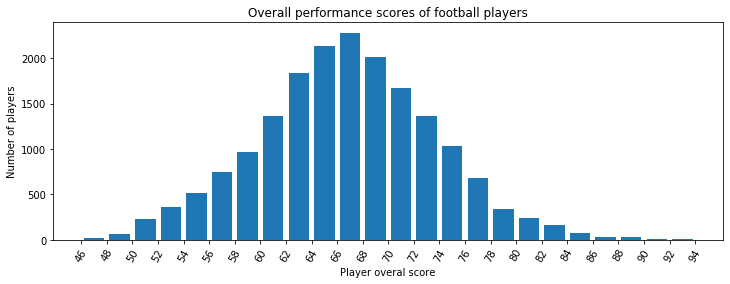

In [4]:
fifa19_BIN_NUMBER = 30

# create integer-specific bins
bin_width = int((max(fifa19_df['Overall']) - min(fifa19_df['Overall']))/BIN_NUMBER) + 1
bin_limits = range(min(fifa19_df['Overall']), max(fifa19_df['Overall']) + bin_width, bin_width)

# redo the histogram
plt.figure(figsize=(12,4))
plt.hist(fifa19_df['Overall'], bins=bin_limits, rwidth=0.8)
plt.xlabel('Player overal score')
plt.ylabel('Number of players')
plt.title('Overall performance scores of football players')
plt.xticks(bin_limits, rotation=60)
plt.show()

### A2. Preprocessing

The features that you will use for the remainder of the tasks are the following; you can safely discard the rest of the columns.

In [5]:
skills = ['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

#### A2.1.
Since your final goal will be to train a *linear machine learning model*, all of the features you use need to be *numerical*. 'Work Rate' refers to how much effort a player puts into his play when attacking and defending, respectively, but it is non-numeric and non-atomic. Transform the feature into _two_ numerical features.

In [6]:
# discard features
fifa19_df = fifa19_df[skills]

# transform 'Work Rate' into two *numerical* features ( .str.split is more efficient than .apply )
# (each feature can take one of three values, 'Low', 'Medium', or 'High')
fifa19_df[['Attack Effort', 'Defense Effort']] = fifa19_df['Work Rate'].str.split("/ ", expand=True)
fifa19_df['Attack Effort'] = fifa19_df['Attack Effort'].map({'Low': 0, 'Medium': 1, 'High': 2})
fifa19_df['Defense Effort'] = fifa19_df['Defense Effort'].map({'Low': 0, 'Medium': 1, 'High': 2})

fifa19_df[['Attack Effort', 'Defense Effort']].head()

,Attack Effort,Defense Effort
0,1,1
1,2,0
2,2,1
3,1,1
4,2,2


#### A2.2.
As it is true for any real-world dataset out there, you might encounter *missing values*. There are numerous ways to *impute* them (fill them up) by looking at records for which these values are not missing.
* Use a *simple aggregation* of the records for which the values are present (not missing) to fill in the missing values.
* Briefly *justify* the choice of your *aggregation scheme*.

We will first **get an idea of the the fields missing values** - both how many values they are missing and their distribution's overall shape.

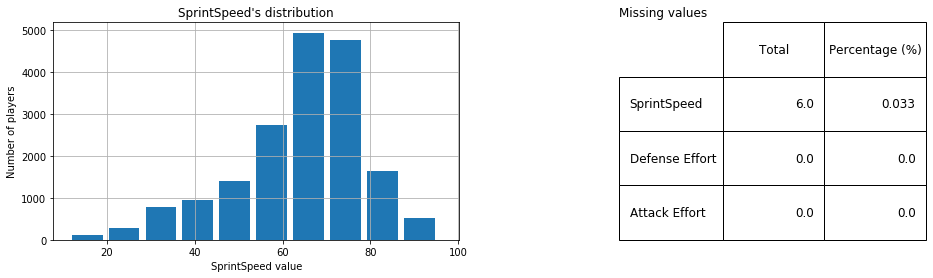

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), gridspec_kw = {'width_ratios':[2, 1]})

# get an idea of the distribution
fifa19_df['SprintSpeed'].hist(ax=ax1, width=7)
ax1.set_title("SprintSpeed's distribution")
ax1.set_xlabel("SprintSpeed value")
ax1.set_ylabel("Number of players")

# get an idea of the missing values
fifa19_in = fifa19_df.isnull()
absolute = fifa19_in.sum().sort_values(ascending=False)[:3]
percentage = 100*(fifa19_in.sum()/fifa19_in.count()).sort_values(ascending=False).round(5)[:3]
fifa19_in = pd.concat([absolute, percentage], axis=1, keys=['Total', 'Percentage (%)'])

font_size=12
bbox=[1, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(
    cellText = fifa19_in.values, rowLabels = fifa19_in.index, 
    bbox=bbox, colLabels=fifa19_in.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax2.set_title("Missing values    ", loc="right")

plt.show()

<div style="display:inline-block;width:68%">
    <p><span style="background-color:rgb(225,225,225);font-family:monospace">SprintSpeed</span> is a numerical variable with values ranging from 12.0 to 96.0. It has 6 missing values. It also displays a left-skewed distribution.</p>
    <p>As such, we decided to replace the missing values with their median, as it is minimizes the distance to any possible value they might have had.</p>
    <p>Finally, it should be noted that there are more advanced imputation methods, like regression imputation (where the missing value is predicted by applying regression over the other variables).</p></div>
<img src="https://sixsigmadsi.com/wp-content/uploads/2018/11/Left-Skewed-Distribution.jpg" style="display:inline-block;width:24%;float:right;margin-right:6%"/>
<div><span style="font-size:6pt"><p></p><p>Image Credits: SSDSI Blog, at https://sixsigmadsi.com/median-measure-of-central-tendency/, on november 2019.</p></span></div>

In [8]:
# fill them in
fifa19_df['SprintSpeed'].fillna(value=fifa19_df['SprintSpeed'].median(), inplace=True)

## A3. Building a regression model

By letting them perform exercises, you have gathered data about the following athletic skills (except for the *overall football performance*) of your candidate players:

In [9]:
athletic_skills = ['Overall', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'Jumping', 'Stamina', 'Strength']

To decide which player to hire, you need to know how these skills transfer to football performance.

To predict the football performance of a player, you want to build a linear model with an additional regularization term to prevent overfitting. The specific model used in this exercise is L2-regularized linear regression, aka "Ridge Regression". It combines the least squares linear regression model that you know from the lecture with a penalty on the norm of the weight vector [1]. The function that Ridge Regression minimizes is

$$||y-Xw||_2^2 + \alpha ||w||_2^2,$$

where $y$ is a vector of overall ratings, $X$ is the matrix of data vectors with each *row* being the features of a football player, $w$ is the weight vector, and $\alpha$ is the (non-negative) regularization parameter.

[1] If there are enough model parameters, a powerful machine learning model will be able to "memorize" the value it is supposed to predict for some training examples. That means, it will perform well on those training examples, but will perform much worse on data that was not used for training. One way to counter this is to penalize large weight values. This can be thought of as reducing the complexity of the model.

### A3.1.
Split the data randomly into a train (70%) and a test set (30%). Use 1 as the random seed.

In [10]:
athletic_df = fifa19_df[athletic_skills]
X_train, X_test, y_train, y_test = train_test_split(athletic_df.drop(['Overall'], axis=1), 
                                                    athletic_df['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)

### A3.2.
Build a Ridge Regression model that predicts a player's overall football performance from the other feature in the list above (sklearn might be helpful here).

Ridge Regression has a regularization parameter $\alpha$. Optimize it in the range [0, 2000] via cross validation. Use as a metric the mean squared error. Plot the cross-validation error as a function of the regularization parameter and choose the best parameter for your final model.

In [11]:
# build ridge models for alphas in range
alpha_range = np.arange(0.1, 2000, 0.1)

ridge_cv = RidgeCV(alphas=alpha_range, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
scores = np.average(ridge_cv.cv_values_,axis=0)

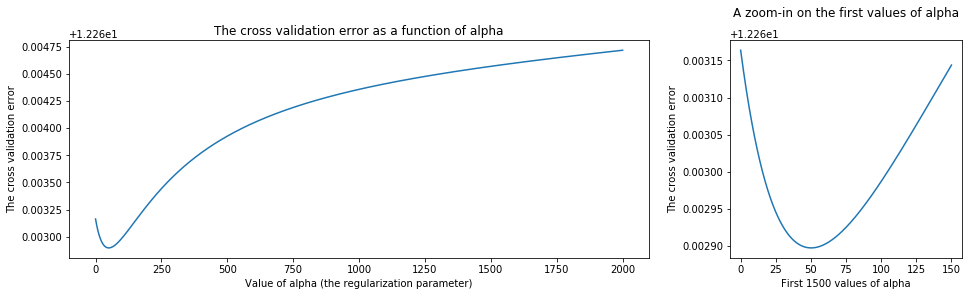

In [12]:
# plot the CV error as a function of alpha
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4), gridspec_kw = {'width_ratios':[5, 2]})

ax1.plot(alpha_range, scores)
ax1.set_title('The cross validation error as a function of alpha')
ax1.set_xlabel('Value of alpha (the regularization parameter)')
ax1.set_ylabel('The cross validation error')


ax2.plot(alpha_range[:1500], scores[:1500])
ax2.set_title('A zoom-in on the first values of alpha', y=1.08)
ax2.set_xlabel('First 1500 values of alpha')
ax2.set_ylabel('The cross validation error')


plt.show()

In [13]:
# pick the best alpha
best_alpha_a3 = ridge_cv.alpha_
print("Best alpha: {}".format(best_alpha_a3))

Best alpha: 50.2


In [14]:
with open('./data/athletic_df.pickle', 'wb') as fp:
    pickle.dump(athletic_df, fp)

## A4. Feature importance


Hiring new players isn't the only job of a manager/head-coach; another important one is training players. While you are at it, you think, why not use the insights gained from the hiring process to also improve the training process of your entire team? Since a training session can only last a limited amount of time and there are several possible exercises to do, you want to know which athletic skill should your training process focus the most upon. Your idea is to use the *weights* of your regression model as a guidance: In your opinion, a *higher weight* for an athletic skill should mean that this skill is highly *predictive* of the football performance.

### A4.1.
* Print the weights. Why might it *not* be a good idea to use them as they are for gauging a skill's importance?
* How can you fix this?
* What has changed due to your fix?

*Hint: Some skills could get disadvantaged (carefully study the ranges of the corresponding features)! This can be prevented by another preprocessing step discussed in the lecture that takes care of differing ranges, after which you need to train the model again.*

In [15]:
with open('./data/athletic_df.pickle', 'rb') as fp:
    athletic_df = pickle.load(fp)
columns = [
    'overall', 'acceleration', 'sprint_speed', 'agility', 'reactions', 
    'balance', 'jumping', 'stamina', 'strength'
]
athletic_df.columns = columns

Now that we know that Ridge regression performs best with a value of 50.2 for $\alpha$, let's retrain this model and extract the coefficients.

In [16]:
ridge = Ridge(alpha=best_alpha_a3)
ridge.fit(X_train, y_train) 
ridge_coeff = ridge.coef_

As you can see below, all coefficients from the ridge model are around the same scale ($10^{-3}$ to $10^{-2}$) except the one associated to the <b>jumping</b> and <b>reactions</b> attribute.

If we look into both columns, we can see that the range of values <b>jumping</b> can take is scaled by a factor of $10^{-2}$ compared to the other attributes. However, the values from the column <b>reactions</b> however, are in the same range as the other attributes. The algorithm might be compensating on the coefficients to palliate the bias introduced by the order of magnitude of some of the attributes.
<br> In order to correct this bias present, we scale all values using the same method.

In [17]:
for j in (range(len(athletic_df.columns)-1)):
    i=j+1
    coef = ridge_coeff[j]
    col = athletic_df.columns[i]
    mini = min(athletic_df[col])
    maxi = max(athletic_df[col])
    print("Column: ",'\033[1m', col, '\033[0m', 'with range:', mini, '-', maxi, 'and coefficient', coef )


Column:   acceleration  with range: 12.0 - 97.0 and coefficient 0.003276065016413896
Column:   sprint_speed  with range: 12.0 - 96.0 and coefficient 0.015757000206961098
Column:   agility  with range: 14.0 - 96.0 and coefficient 0.04791018814314656
Column:   reactions  with range: 21.0 - 96.0 and coefficient 0.6051317196873204
Column:   balance  with range: 16.0 - 96.0 and coefficient -0.032795191560489836
Column:   jumping  with range: 0.15 - 0.95 and coefficient 0.43494453734129934
Column:   stamina  with range: 12.0 - 96.0 and coefficient -0.007503088137763341
Column:   strength  with range: 17.0 - 97.0 and coefficient 0.07142683181603393


In order to choose which scaling method to apply (*min max scaling* or *standardisation*), we first need to check whether the data has outliers (in which case we need to reject the min max scaling method) or if it's normally distributed (in which case we can use the *standardisation*. <br>

From the plot below, we can infer that each of the columns has its fair share of outliers, and most of them follow a left skewed distribution. However, the outliers, though plentiful, are not too spread from the quartiles. We decide thus to apply the *min max scaling scaling* method to our dataframe.

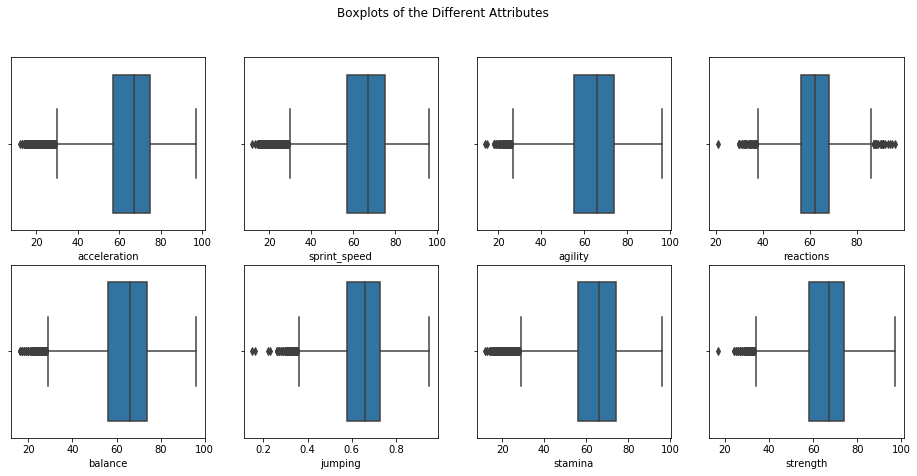

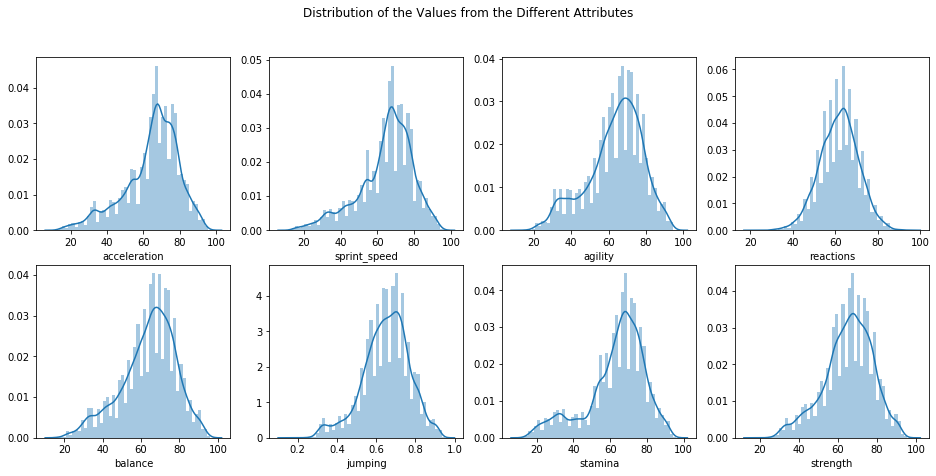

In [18]:
# Checking for outliers
plt.figure(figsize=(16, 7))
for j in range(len(athletic_df.columns)-1):
    i=j+1
    
    col = athletic_df.columns[i]
    
    plt.subplot(2, 4, i)
    sns.boxplot(athletic_df[col])
plt.suptitle('Boxplots of the Different Attributes')
plt.show()
    
# Checking for normal distribution
plt.figure(figsize=(16, 7))
for j in range(len(athletic_df.columns)-1):
    i=j+1
    
    col = athletic_df.columns[i]
    
    plt.subplot(2, 4, i)
    sns.distplot(athletic_df[col])
plt.suptitle('Distribution of the Values from the Different Attributes')
plt.show()

We use the library <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a> from scikit-learn in order to scale our data and retrain our ridge regression model such that all attributes have values centered around 0 with a standard deviation of 1.
<br>
Now, we can observe that the range of values had quite a consequent impact on the values of the weights.

In [19]:
# Scaling the data
scaler = MinMaxScaler()
athletic_df = pd.DataFrame(scaler.fit_transform(athletic_df))
athletic_df.columns = columns

X_train, X_test, y_train, y_test = train_test_split(athletic_df.drop(['overall'], axis=1), 
                                                    athletic_df['overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)


# Finding the best alpha
alpha_range = np.arange(0.1, 2000, 0.1)

ridge_cv = RidgeCV(alphas=alpha_range, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
scores = np.average(ridge_cv.cv_values_,axis=0)
best_alpha_a4 = ridge_cv.alpha_

print('Best alpha for the scaled athletic data is ', best_alpha_a4)


# Retraining the model
ridge = Ridge(alpha=best_alpha_a4)
ridge.fit(X_train, y_train) 
ridge_coeff_scaled = ridge.coef_

# Printing the range and coefficients of the model for each attributes
for j in range(len(athletic_df.columns)-1):
    i=j+1
    coef = ridge_coeff_scaled[j]
    col = athletic_df.columns[i]
    mini = min(athletic_df[col])
    maxi = max(athletic_df[col])
    print("Column: ",'\033[1m', col, '\033[0m', 'with range:', round(mini, 3), '-', round(maxi, 3), 'and coefficient', coef )

Best alpha for the scaled athletic data is  0.1
Column:   acceleration  with range: 0.0 - 1.0 and coefficient 0.005884324562724396
Column:   sprint_speed  with range: 0.0 - 1.0 and coefficient 0.027396120628545566
Column:   agility  with range: 0.0 - 1.0 and coefficient 0.08183038883595332
Column:   reactions  with range: 0.0 - 1.0 and coefficient 0.9447146879328917
Column:   balance  with range: 0.0 - 1.0 and coefficient -0.055124172062012505
Column:   jumping  with range: 0.0 - 1.0 and coefficient 0.00988723990097848
Column:   stamina  with range: 0.0 - 1.0 and coefficient -0.013227438461555248
Column:   strength  with range: 0.0 - 1.0 and coefficient 0.11828379594611962


### A4.2.
* After the *fix* in step A4.1., is everything fine now with the weights? Sort the weights in descending order. Do you observe anything unexpected with the lowest-ranked weights?
* Do you have an idea what could be the potential cause for this? (No need to analytically prove your hypothesis.)
* Come up with a better way to gauge the importance of a feature for the overall performance.

The order of magnitude of the coefficients of some attributes have significantly changed. The columns **strength** and **agility** have now some of the largest weights, while **jumping** is one of the smallest.
Let's sort them from highest (top) to lowest (bottom) weights:

In [20]:
# Creating a dataframe with the old and new weights
weights = pd.DataFrame([ridge_coeff, ridge_coeff_scaled], columns = columns[1:]).transpose()
weights.columns = ['Before scaling','After scaling']

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
display_side_by_side(weights[['Before scaling']].sort_values('Before scaling', ascending=False), 
                     weights[['After scaling']].sort_values('After scaling', ascending=False))

,Before scaling
reactions,0.605132
jumping,0.434945
strength,0.071427
agility,0.047910
sprint_speed,0.015757
acceleration,0.003276
stamina,-0.007503
balance,-0.032795
,After scaling
reactions,0.944715


We can observe that **jumping** went down three places, while the other attributes kept the same ranking. Scaling all attributes to place them on the same order of magnitude and not generate arbitrarily high weights to compensate the difference in orders solved the problem. We have now a more realistic idea of how each attributes influences the algorithm's decision. <br>
However, we can see that just sorting them from highest to lowest values is not enough. Indeed, we can notice that **balance** and **stamina**, which are quite important characteristics in assessing the global performances of a player, have negative coefficients and are placed last. <br>
Having negative coefficients is quite a surprise, because you would think that having more balance, or more stamina could only be beneficial to the performance of a player. However, it could be that there are not enough features for the model to use all the data in a way that makes sense to us, and decided to use some of the features to tweak the approximation closer to the real function. Those features don't have a physical meaning, but rather an approximation mean for the algorithm to get to the optimal function. A way to correct that would be to force weights to always be positive through a regularisation term that would make the error skyrocket if any weights are negatives, or to insert more random data, and see if the algorithm uses this noise to approximate the function rather than features supposed to be meaningful
<br>
Another simpler reason for this might be that we are looking at the values of the coefficients rather than their absolute value. It could be that the way **stamina** and **balance** are computed returns values inversely proportional to the way performance is computed. <br>
Trying to account for the absolute value only, we obtain the following tables:

In [21]:
display_side_by_side(weights.iloc[(-weights['Before scaling'].abs()).argsort()][['Before scaling']],
                     weights.iloc[(-weights['After scaling'].abs()).argsort()][['After scaling']])

,Before scaling
reactions,0.605132
jumping,0.434945
strength,0.071427
agility,0.047910
balance,-0.032795
sprint_speed,0.015757
stamina,-0.007503
acceleration,0.003276
,After scaling
reactions,0.944715


Now, this ranking makes much sense. A player's stamina should count more than their ability to jump around. And their balance to master the ball should also be placed a bit higher than last place.

## A5. Model Improvements

During the ongoing recruiting process, it turns out that attending all the ADA lectures and tutorials has paid off: Solving the ADA homework went like a charm and you are already done with it. Now you wonder whether it is worth going to some football games of the candidates to assess their football-related skills explicitly, and include these skills in training your ML model.

### A5.1. Improving the model
Train a second model, this time also including as features the football-related skills from the list in the step **A2**. Again use cross validation to compute the best hyperparameter in the range [0,2000].

<br>
<br>
Before diving into the analysis, we first preprocess some of the columns that hadn't be looked over in the previous phases. More specifically, we one hot encoded the attributed **Work Rate** in order to deal with the categorical textual data. We also fill in any NA values that would have occured in Sprint Speed.
<br>
We reload the data in order to compute the bootstrap sampling both on the scaled and non scaled data.

In [22]:
skills = ['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

fifa19_df = pd.read_csv('data/fifa19_players.csv', delimiter=',')

# discard features
fifa19_df = fifa19_df[skills]

# transform 'Work Rate' into two *numerical* features ( .str.split is more efficient than .apply )
# (each feature can take one of three values, 'Low', 'Medium', or 'High')
fifa19_df[['Attack Effort', 'Defense Effort']] = fifa19_df['Work Rate'].str.split("/ ", expand=True)
fifa19_df['Attack Effort'] = fifa19_df['Attack Effort'].map({'Low': 0, 'Medium': 1, 'High': 2})
fifa19_df['Defense Effort'] = fifa19_df['Defense Effort'].map({'Low': 0, 'Medium': 1, 'High': 2})

# One hot encoding textual/categorical data (in work rate)
fifa19_df['SprintSpeed'].fillna(value=fifa19_df['SprintSpeed'].median(), inplace=True)
fifa19_df = pd.get_dummies(fifa19_df,prefix=['Work Rate'])
columns = fifa19_df.columns

scaler = MinMaxScaler()
fifa19_df_scaled = pd.DataFrame(scaler.fit_transform(fifa19_df))
fifa19_df_scaled.columns = columns

display(fifa19_df.head())
display(fifa19_df_scaled.head())

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Defense Effort,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,94,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,1,0,0,0,0,0,0,0,0,1
1,94,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,0,0,1,0,0,0,0,0,0,0
2,92,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,1,0,0,1,0,0,0,0,0,0
3,91,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,1,0,0,0,0,0,0,0,0,1
4,91,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,2,1,0,0,0,0,0,0,0,0


,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Defense Effort,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,1.000000,0.75,0.75,0.897727,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.75,1.00,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.958333,1.00,1.00,0.840909,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,...,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.937500,0.50,0.00,0.136364,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.937500,1.00,0.75,1.000000,0.860215,0.566667,0.988372,0.906977,0.881720,0.897727,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
with open('./data/athletic_df.pickle', 'rb') as fp:
    athletic_df = pickle.load(fp)
columns = [
    'overall', 'acceleration', 'sprint_speed', 'agility', 'reactions', 
    'balance', 'jumping', 'stamina', 'strength'
]
athletic_df.columns = columns

scaler = MinMaxScaler()
athletic_df_scaled = pd.DataFrame(scaler.fit_transform(athletic_df))
athletic_df_scaled.columns = columns


In [24]:
# Finding the best alpha for the scaled fifa19_df data
alpha_range = np.arange(0.1, 2000, 0.1)

X_train, X_test, y_train, y_test = train_test_split(fifa19_df_scaled.drop(['Overall'], axis=1), 
                                                    fifa19_df_scaled['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)

ridge_cv = RidgeCV(alphas=alpha_range, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
scores = np.average(ridge_cv.cv_values_,axis=0)
best_alpha_scaled_a5 = ridge_cv.alpha_

The best value for alpha for the ridge model on the scaled fifa data is 0.6


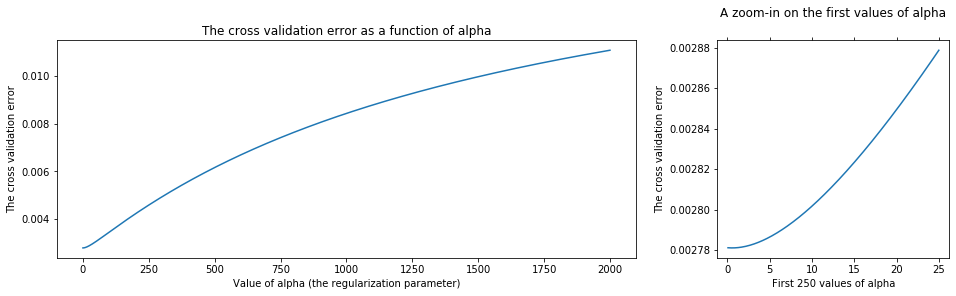

In [25]:
# plot the CV error as a function of alpha
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4), gridspec_kw = {'width_ratios':[5, 2]})

ax1.plot(alpha_range, scores)
ax1.set_title('The cross validation error as a function of alpha')
ax1.set_xlabel('Value of alpha (the regularization parameter)')
ax1.set_ylabel('The cross validation error')


ax2.plot(alpha_range[:250], scores[:250])
ax2.set_title('A zoom-in on the first values of alpha', y=1.08)
ax2.set_xlabel('First 250 values of alpha')
ax2.set_ylabel('The cross validation error')
ax2.tick_params( top='off')

print("The best value for alpha for the ridge model on the scaled fifa data is", best_alpha_scaled_a5)

In [26]:
# Finding the best alpha for the non scaled fifa19_df data
alpha_range = np.arange(0.1, 2000, 0.1)
    
X_train, X_test, y_train, y_test = train_test_split(fifa19_df.drop(['Overall'], axis=1), 
                                                    fifa19_df['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
ridge_cv = RidgeCV(alphas=alpha_range, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
scores = np.average(ridge_cv.cv_values_,axis=0)
best_alpha_ns_a5 = ridge_cv.alpha_

The best value for alpha for the ridge model on the scaled fifa data is 6.1


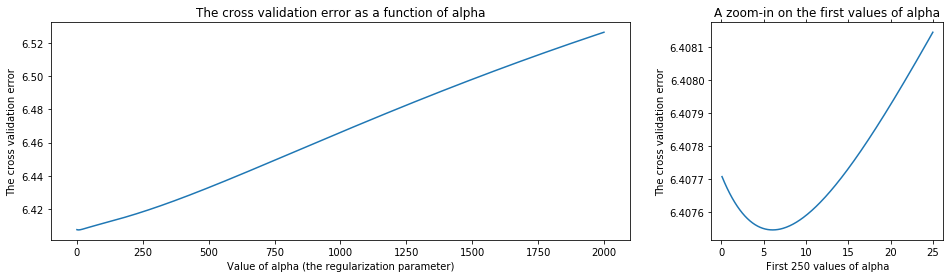

In [27]:
# plot the CV error as a function of alpha
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4), gridspec_kw = {'width_ratios':[5, 2]})

ax1.plot(alpha_range, scores)
ax1.set_title('The cross validation error as a function of alpha')
ax1.set_xlabel('Value of alpha (the regularization parameter)')
ax1.set_ylabel('The cross validation error')


ax2.plot(alpha_range[:250], scores[:250])
ax2.set_title('A zoom-in on the first values of alpha')
ax2.set_xlabel('First 250 values of alpha')
ax2.set_ylabel('The cross validation error')
ax2.tick_params( top='off')

print("The best value for alpha for the ridge model on the scaled fifa data is", best_alpha_ns_a5)

### A5.2. Assessing the improvement
Compute *bootstrap confidence intervals* for the mean squared error that the two models (trained in the steps **A3** and **A5.1**) make. Retrain both models *1000 times*, each time with a different random train/test split, and compute the respective mean squared errors.   
*Note: Use the 'optimal regularization parameters' already found via cross validation in steps **A4.1** and **A5.1**.*

* Find the *two-sided 95% confidence intervals* via bootstrap resampling and plot the mean error together with the confidence interval in a bar plot.
* What can you say about the properties of the models based on the confidence intervals?
* Do you have sufficient evidence to claim that one model is clearly better than the other? Clearly explain your observations!

<br>
<br>
This time, we will definitely scale our attributes to avoid any funny surprises from the weights. We use a value of $alpha$ of 4.8 for the first model with only the attributes presented in A5, and a value of $alpha$ of 11.1 for the second model with the attributes listed in A3.
<br>
In order to compute the bootstrap statistics, we run the model on a 1000 random samples and collect the mean square error. Each of those sample has the same size of the original data, in order to have enough data to retrieve meaningful statistics, and may contains several time the same data point.

In [28]:
# Rerunning the model with the data from A3 a thousand times.
bootstrap_scores_A3 = []
for i in range(1000):
    indices_sample = np.random.choice(list(range(len(athletic_df))), 
                                      len(athletic_df), replace=True)
    athletic_sample = athletic_df.iloc[indices_sample]
    
    X_train, X_test, y_train, y_test = train_test_split(athletic_sample.drop(['overall'], axis=1), 
                                                    athletic_sample['overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
    ridge = Ridge(alpha=best_alpha_a3)
    ridge.fit(X_train, y_train) 
    
    cv_scores = cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    bootstrap_scores_A3.append(-1*np.average(cv_scores))
with open('./data/bootstrap_scores_A3nonscaled.pkl', 'wb') as fp:
    pickle.dump(bootstrap_scores_A3, fp)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(athletic_df.drop(['overall'], axis=1), 
                                                    athletic_df['overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
ridge = Ridge(alpha=best_alpha_a3)
ridge.fit(X_train, y_train) 

A3 = -1 * cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

In [30]:
# Rerunning the model with the data from A3 a thousand times.
bootstrap_scores_A3_scaled = []
for i in range(1000):
    indices_sample = np.random.choice(list(range(len(athletic_df_scaled))), 
                                      len(athletic_df_scaled), replace=True)
    athletic_sample = athletic_df_scaled.iloc[indices_sample]
    
    X_train, X_test, y_train, y_test = train_test_split(athletic_sample.drop(['overall'], axis=1), 
                                                    athletic_sample['overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
    ridge = Ridge(alpha=best_alpha_a4)
    ridge.fit(X_train, y_train) 
    
    cv_scores = cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    bootstrap_scores_A3_scaled.append(-1*np.average(cv_scores))
with open('./data/bootstrap_scores_A3_scaled.pkl', 'wb') as fp:
    pickle.dump(bootstrap_scores_A3_scaled, fp)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(athletic_df_scaled.drop(['overall'], axis=1), 
                                                    athletic_df_scaled['overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
ridge = Ridge(alpha=best_alpha_a4)
ridge.fit(X_train, y_train) 

A3_scaled = -1 * cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

In [32]:
bootstrap_scores_A5 = []
for i in range(1000):        
    indices_sample = np.random.choice(list(range(len(fifa19_df))),
                                     len(fifa19_df), replace=True)
    fifa_sample = fifa19_df.iloc[indices_sample]
    
    X_train, X_test, y_train, y_test = train_test_split(fifa_sample.drop(['Overall'], axis=1), 
                                                    fifa_sample['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
    ridge = Ridge(alpha=best_alpha_ns_a5)
    ridge.fit(X_train, y_train) 
    
    cv_scores = cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    bootstrap_scores_A5.append(-1*np.average(cv_scores))
    
with open('./data/bootstrap_scores_A5nonscaled.pkl', 'wb') as fp:
    pickle.dump(bootstrap_scores_A5, fp)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(fifa19_df.drop(['Overall'], axis=1), 
                                                    fifa19_df['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
ridge = Ridge(alpha=best_alpha_ns_a5)
ridge.fit(X_train, y_train) 

A5 = -1 * cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

In [34]:
bootstrap_scores_A5_scaled = []
for i in range(1000):        
    indices_sample = np.random.choice(list(range(len(fifa19_df_scaled))),
                                     len(fifa19_df_scaled), replace=True)
    fifa_sample = fifa19_df_scaled.iloc[indices_sample]
    
    X_train, X_test, y_train, y_test = train_test_split(fifa_sample.drop(['Overall'], axis=1), 
                                                    fifa_sample['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
    ridge = Ridge(alpha=best_alpha_scaled_a5)
    ridge.fit(X_train, y_train) 
    
    cv_scores = cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    bootstrap_scores_A5_scaled.append(-1*np.average(cv_scores))
    
with open('./data/bootstrap_scores_A5_scaled.pkl', 'wb') as fp:
    pickle.dump(bootstrap_scores_A5_scaled, fp)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(fifa19_df_scaled.drop(['Overall'], axis=1), 
                                                    fifa19_df_scaled['Overall'], 
                                                    test_size=0.30, 
                                                    random_state=1)
    
    
ridge = Ridge(alpha=best_alpha_scaled_a5)
ridge.fit(X_train, y_train) 

A5_scaled = -1 * cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

From the graph below, we can see that the confidence interval of the model built on fewer features is larger. That means that there is much more variance in this model than in the one using more attributes. <br>
Additionally, we can observe that the lower bound of the confidence interval of the mean square error computed on the athletic features is higher than the higher bound of the confidence interval of the model computed with all attributes. <br>
Thus, we can conclude that in A3, we ommitted features that would have helped improve the prediction of the players' performances. Indeed, not only is the mean computed on the 1000 samples during the bootstrap sampling lower for the model using the attributes in A5, its confidence interval is narrower than the one with a smaller range of features. This implies that on average the error is lower, and that the variance of the error computed on multiple samples is also lower.
<br> In this particular case, we could conclude that adding (*meaningful*) features has improved the algorithm's performance.

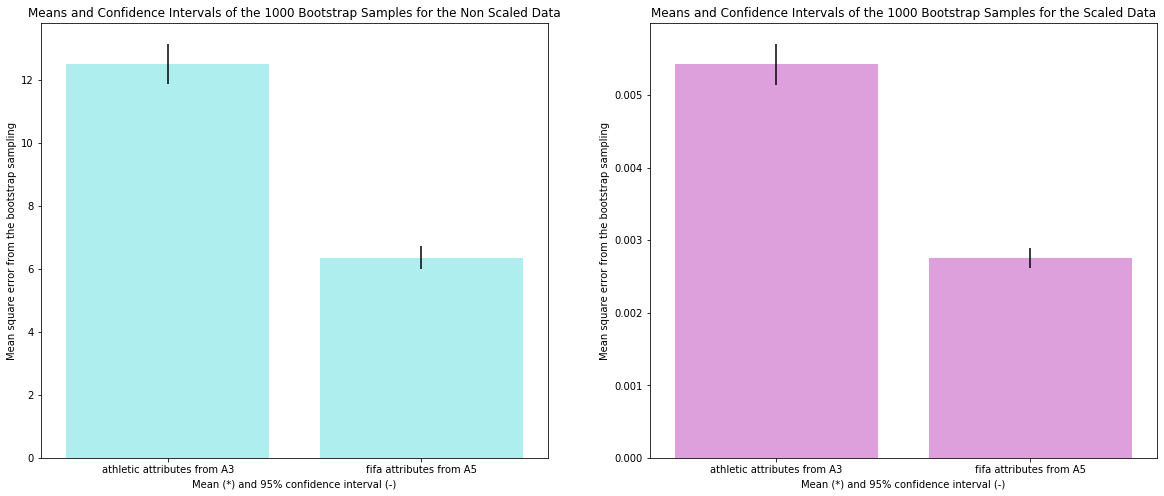

In [36]:
bootstrap_scores_A3 = np.sort(bootstrap_scores_A3)
bootstrap_scores_A5 = np.sort(bootstrap_scores_A5)
lower_boot_A3 = np.mean(bootstrap_scores_A3[25])
higher_boot_A3 = np.mean(bootstrap_scores_A3[975])
lower_boot_A5 = np.mean(bootstrap_scores_A5[25])
higher_boot_A5 = np.mean(bootstrap_scores_A5[975])

bootstrap_scores_A3_scaled = np.sort(bootstrap_scores_A3_scaled)
bootstrap_scores_A5_scaled = np.sort(bootstrap_scores_A5_scaled)
lower_boot_A3_scaled = np.mean(bootstrap_scores_A3_scaled[25])
higher_boot_A3_scaled = np.mean(bootstrap_scores_A3_scaled[975])
lower_boot_A5_scaled = np.mean(bootstrap_scores_A5_scaled[25])
higher_boot_A5_scaled = np.mean(bootstrap_scores_A5_scaled[975])

means = [np.mean(A3), np.mean(A5)]
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
yerrs = [np.mean(lower_boot_A3 - A3), np.mean(higher_boot_A3 - A3)]
plt.bar([0, 1], means, yerr=yerrs, color='paleturquoise')
plt.xticks([0, 1], ['athletic attributes from A3', 'fifa attributes from A5'])
plt.xlim(-0.5, 1.5)
plt.title('Means and Confidence Intervals of the 1000 Bootstrap Samples for the Non Scaled Data')
plt.xlabel('Mean (*) and 95% confidence interval (-)')
plt.ylabel("Mean square error from the bootstrap sampling")

plt.subplot(1, 2, 2)
errors = np.array([[lower_boot_A3_scaled, lower_boot_A5_scaled], [higher_boot_A3_scaled, higher_boot_A5_scaled]])
means = [np.mean(A3_scaled), np.mean(A5_scaled)]
yerrs = [np.mean(lower_boot_A3_scaled - A3_scaled), np.mean(higher_boot_A3_scaled - A3_scaled)]
plt.bar([0, 1], means, yerr=yerrs, color='plum')
plt.xticks([0, 1], ['athletic attributes from A3', 'fifa attributes from A5'])
plt.xlim(-0.5, 1.5)
plt.title('Means and Confidence Intervals of the 1000 Bootstrap Samples for the Scaled Data')
plt.xlabel('Mean (*) and 95% confidence interval (-)')
plt.ylabel("Mean square error from the bootstrap sampling")
plt.show()

# Task B: Scaling up

## Description

[Reddit](https://www.reddit.com/) aka *'the front page of the internet'* is a network of over a million *communities* aka *'subreddits'*, each of which covers a different topic based on people's interests. In other words, it is a *massive* collection of forums (corresponding to the aforementioned communities), where people can share content specific to a given topic or comment on other people’s posts.   

You are reddit's community manager and want to *appoint new moderators*. Because moderating a specific subreddit isn't a full-time job, you want the chosen moderators to moderate multiple subreddits at the same time. To make this choice effective, the moderators shouldn't have to spend too much time getting to know the community and the prevalent communication style, so it makes sense to let moderators moderate subreddits that are similar in communication style and language. At the same time, it also makes sense to let them moderate subreddits that are similar with respect to the participating users, because this allows moderators to track the behavior of individual users over multiple subreddits. For example, some users might only post offensive content once a month on a given subreddit, and therefore fly under the radar with someone moderating only that subreddit. However, considering all the subreddits these users post to, they might post something offensive every day but on different subreddits. Thus, a moderator in charge of all these subreddits would be able to ban such users much more effectively. In the light of the above description, your task is to find out ways to choose moderators considering both the textual content and the users of a subreddit.

### Dataset:
The dataset provided to you includes all the posts of the 15 largest subreddits written as of May 2015.

Reddit posts (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/19SVHKbUTUPtC9HMmADJcAAIY1Xjq6WFv/view?usp=sharing))
```
reddit_posts
 |-- id: id of the post 
 |-- author: user name of the author 
 |-- body: text of the message
 |-- subreddit: name of the subreddit
```

Reddit scores (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/1vr4PolJzTXr6ODSe3ucib5EAyp3rjxec/view?usp=sharing))
```
reddit_scores
 |-- id: id of the post 
 |-- score: score computed as sum of UP/DOWN votes
```

*Note: Jaccard similarity between subreddits represented using either the set of top-1000 words or the set of users can be computed locally (on the driver), however, all the other tasks have to be implemented in Spark.*

## B1. Getting a sense of the data

Start a PySpark instance...

In [40]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SQLContext

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '6G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

... and load the data in a Spark dataframe.

In [41]:
messages_df = spark.read.load("./data/messages.json", format="json")
score_df = spark.read.load("./data/score.json", format="json")

These are the schemas of the 2 datasets loaded from the files

In [42]:
messages_df.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- id: string (nullable = true)
 |-- subreddit: string (nullable = true)



In [43]:
score_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- score: long (nullable = true)



### B1.1. Identify the most active subreddit

Print the list of subreddits along with the following information:
1. The total number of posts
2. The number of users with at least 1 message
3. The mean message length

*Note: Keep everything in one single dataframe and print the list sorted by number of posts in descending order.*

We create one DataFrame to answer each questions and then merge them all into one single DataFrame called '*subreddits*'

In [45]:
# 1. Total number of posts
subreddits = messages_df.groupBy("subreddit")
subreddit_activity = subreddits.agg(count("*").alias("numPosts"))

In [46]:
# 2. Number of users with at least 1 message
users = messages_df.groupBy(["subreddit", "author"]).count()
users_per_subreddit = users.groupBy("subreddit").agg(count("*").alias("numUsers"))

In [47]:
# 3. Mean message length
message_length = messages_df.withColumn("length", length("body"))
message_length = message_length.groupBy("subreddit").agg(mean("length").alias("meanLength"))

In [48]:
# Join the results from the 3 tables
subreddit_stats = subreddit_activity.join(users_per_subreddit, ["subreddit"]).join(message_length,["subreddit"])
subreddit_stats = subreddit_stats.sort(desc("numPosts"))
subreddit_stats.show()

+---------------+--------+--------+------------------+
|      subreddit|numPosts|numUsers|        meanLength|
+---------------+--------+--------+------------------+
|leagueoflegends| 1151287|  119321|152.72280760574904|
|            nba|  704862|   45034|106.48656758344187|
|          funny|  691139|  224077|106.82283882113438|
|           pics|  564502|  205305| 114.9710045314277|
|            nfl|  534345|   41593|148.96989211090212|
|         videos|  511492|  157628|170.22702603364274|
|           news|  477658|   98736| 230.9491602778557|
| DestinyTheGame|  471160|   37008|165.41786866457255|
|         soccer|  455215|   41648|134.42224663071295|
|          DotA2|  445154|   41466|141.48906670500546|
|      worldnews|  439417|   99261|224.93754679495785|
|  AdviceAnimals|  411902|  115815| 159.2513801826648|
|         hockey|  389329|   25568| 95.37287230080472|
|GlobalOffensive|  382017|   46686| 147.2883981602913|
|         movies|  354601|   92484|164.83209297210104|
+---------

The table shows the number of posts made for each subreddit, the number of users and the mean length of the posts published in each subreddit

### B1.2. Identify the largest subreddit

Print *two* different lists of subreddits: ordered by (1) the number of posts, and (2) the number of users. For each subreddit, print the name and the corresponding counts.

Additionally, (3) plot the mean of message length for each subreddit in descending order. Visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well.

Since we created the corresponding table in the previous exercise. We can now show the results

__1. Number of posts__

The following tables shows the number of posts made in each subreddit

In [49]:
num_posts = subreddit_activity.sort(desc("numPosts"))
num_posts.show()

+---------------+--------+
|      subreddit|numPosts|
+---------------+--------+
|leagueoflegends| 1151287|
|            nba|  704862|
|          funny|  691139|
|           pics|  564502|
|            nfl|  534345|
|         videos|  511492|
|           news|  477658|
| DestinyTheGame|  471160|
|         soccer|  455215|
|          DotA2|  445154|
|      worldnews|  439417|
|  AdviceAnimals|  411902|
|         hockey|  389329|
|GlobalOffensive|  382017|
|         movies|  354601|
+---------------+--------+



__2. Number of users__

The following tables shows the number users for each subreddit

In [50]:
num_users = users_per_subreddit.sort(desc("numUsers"))
num_users.show()

+---------------+--------+
|      subreddit|numUsers|
+---------------+--------+
|          funny|  224077|
|           pics|  205305|
|         videos|  157628|
|leagueoflegends|  119321|
|  AdviceAnimals|  115815|
|      worldnews|   99261|
|           news|   98736|
|         movies|   92484|
|GlobalOffensive|   46686|
|            nba|   45034|
|         soccer|   41648|
|            nfl|   41593|
|          DotA2|   41466|
| DestinyTheGame|   37008|
|         hockey|   25568|
+---------------+--------+



__3. Mean length__

The following tables shows the mean length of the posts made in each subreddit

In [51]:
message_length = message_length.sort(desc("meanLength"))
message_length.show()

+---------------+------------------+
|      subreddit|        meanLength|
+---------------+------------------+
|           news| 230.9491602778557|
|      worldnews|224.93754679495785|
|         videos|170.22702603364274|
| DestinyTheGame|165.41786866457255|
|         movies|164.83209297210104|
|  AdviceAnimals| 159.2513801826648|
|leagueoflegends|152.72280760574904|
|            nfl|148.96989211090212|
|GlobalOffensive| 147.2883981602913|
|          DotA2|141.48906670500546|
|         soccer|134.42224663071295|
|           pics| 114.9710045314277|
|          funny|106.82283882113438|
|            nba|106.48656758344187|
|         hockey| 95.37287230080472|
+---------------+------------------+



Finally, we are going to plot the mean message length made in each subreddit with their corresponding 99% confidence intervals (CI).

To do so, we assume the mean message length can be modeled with a normal distrubtion, as following the central limit theorem the distribution of means is normal and therefore here since we have a sample of the data we can treat it as t-distribution to build the CI, however since our data is big enough with the smallest subreddit having 350 thousand messages, we can assume it is normally distributed.

And we first try the parametric approach by computing the standard error and multiplying it by 2.58 which is the zStat for the 99.5th percentile

In [127]:
# Parametric approach

message_length = messages_df.withColumn("length", length("body"))
message_length = message_length.groupBy("subreddit").agg(mean("length").alias("meanLength"), stddev("length").alias("stdLength"), count("length").alias("numSamples") )
message_length = message_length.withColumn("zStat*stderr", lit(2.58) * (message_length.stdLength / sqrt("numSamples")))

message_length_pd = message_length.toPandas()
message_length_pd = message_length_pd.sort_values(["meanLength"],ascending=False)
message_length_pd = message_length_pd.reset_index().drop(columns=["index"])
message_length_pd.head(5)

,subreddit,meanLength,stdLength,numSamples,zStat*stderr
0,news,230.949160,334.516180,477658,1.248758
1,worldnews,224.937547,355.402419,439417,1.383253
2,videos,170.227026,290.461162,511492,1.047824
3,DestinyTheGame,165.417869,225.444718,471160,0.847375
4,movies,164.832093,255.503286,354601,1.106996


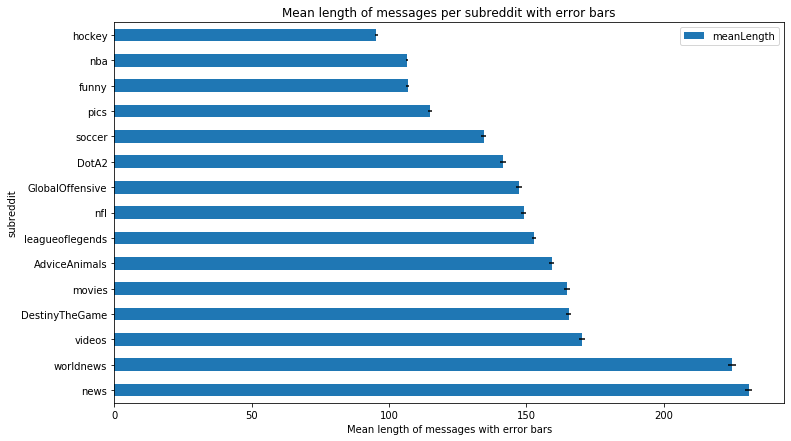

In [128]:
message_length_pd.plot.barh(x='subreddit', y='meanLength', xerr='zStat*stderr',
                         figsize=(12,7))
plt.xlabel('Mean length of messages with error bars')
plt.title('Mean length of messages per subreddit with error bars')
plt.show()

Next, we use a non-parametric approach. We sample the dataset with replacement k times, compute the mean for each time and then use the mean 0.005 quantile and the 0.995 quantiles. The difference of these quantiles with the mean create the 99% confidence intervals for each subreddit.  

In [70]:
#non-parametric
k = 100

# compute the 1st time separately to create the datframe
message_length_r = messages_df.sample(True,1.0)
message_length_r = message_length_r.withColumn("length", length("body") )
message_length_r = message_length_r.groupBy("subreddit").agg(mean("length").alias("meanLength"))

for i in range(k-1):
    # sample and compute the statistics k-1 times
    message_length_k = messages_df.sample(True,1.0)
    message_length_k = message_length_k.withColumn("length", length("body"))
    message_length_k = message_length_k.groupBy("subreddit").agg(mean("length").alias("meanLength"))
    message_length_r = message_length_r.union(message_length_k)

Compute the quantiles

In [71]:
sqlContext = SQLContext(sc)
# Add quantilies to dataframe
message_length_r.registerTempTable("message_length_r")
message_length_l = sqlContext.sql("select subreddit, percentile_approx(meanLength, 0.005) as quantile_l from message_length_r group by subreddit")
message_length_h = sqlContext.sql("select subreddit, percentile_approx(meanLength, 0.995) as quantile_h from message_length_r group by subreddit")

In [72]:
# Compute mean length
mean_length = messages_df.withColumn("length", length("body"))
mean_length = mean_length.groupBy("subreddit").agg(mean("length").alias("meanLength"))

In [73]:
message_length_join = message_length_l.join(message_length_h, ["subreddit"])
message_length_join = message_length_join.join(mean_length, ["subreddit"])

The table below shows the 0.005 quantile (quantile_l), 0.995 quantile (quantile_h) and the mean for each subreddit in Spark.

Now, we are going to create a Pandas dataframe and plot the mean with the corresponding confidence intervals.

In [74]:
message_length_pd = message_length_join.toPandas()
message_length_pd = message_length_pd.sort_values(["meanLength"],ascending=False)
message_length_pd = message_length_pd.reset_index().drop(columns=["index"])
message_length_pd.head(4)

,subreddit,quantile_l,quantile_h,meanLength
0,news,229.776533,232.326665,230.949160
1,worldnews,223.689906,226.086031,224.937547
2,videos,169.385319,171.218125,170.227026
3,DestinyTheGame,164.773251,166.201076,165.417869


In [75]:
xerr=[message_length_pd["quantile_l"] - message_length_pd["meanLength"],
      message_length_pd["quantile_h"] - message_length_pd["meanLength"]]

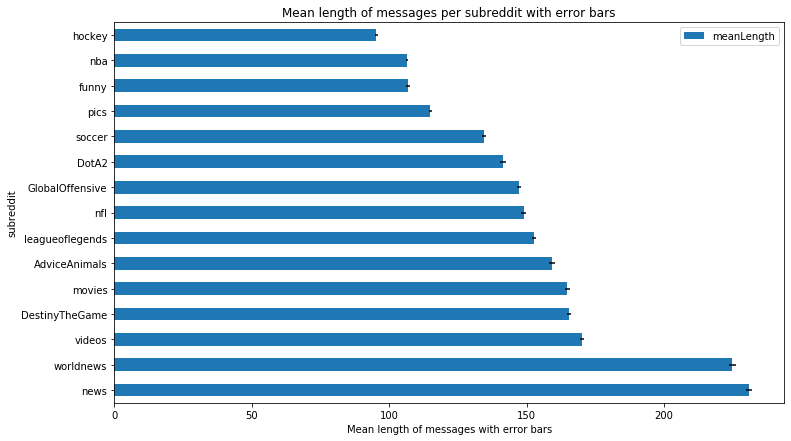

In [76]:
message_length_pd.plot.barh(x='subreddit', y='meanLength', xerr=xerr,
                         figsize=(12,7))
plt.title('Mean length of messages per subreddit with error bars')
plt.xlabel('Mean length of messages with error bars')
plt.show()

The two plots from the parametric approach and non-parametric approach appear very similar to each other, also looking at the numbers printed before plotting for both approaches we can verify that corresponding intervals seems similar in length but the bootstrap ones sometimes are not symmetric around our original mean.

### B1.3. Identify the subreddit with the highest average score

Print the list of subreddits sorted by their average content scores.

First, we merge our 2 datasets to obtain the score given to each comment

In [77]:
joint = messages_df.join(score_df, ["id"])
joint.show(5)

+-------+--------------+--------------------+---------+-----+
|     id|        author|                body|subreddit|score|
+-------+--------------+--------------------+---------+-----+
|cqugak4|FIDEL_CASHFLOW|   it's worth a shot|      nfl|    2|
|cqugb1r| Heyo_Maggots_|I'm using: http:/...|      nfl|    1|
|cqugcoc|        Donk72|Starting to feel ...|    funny|    1|
|cqugext|         S8975|           Very cool|     pics|   11|
|cqugg53|       brutmax|Jesus a technical...|      nba|   -4|
+-------+--------------+--------------------+---------+-----+
only showing top 5 rows



Then, we group the table by subreddits and calculate the mean score of the subreddit. Eventually we sort the results by score. 

Looking at the table below, we observe the subreddit '_videos_' is the community with the highest average score. By contrast, '_DestinyTheGame_' has the lowest average score.

In [79]:
average_scores = joint.groupBy("subreddit").agg(mean("score").alias("averageScore"))
average_scores = average_scores.sort(desc("averageScore"))
average_scores.show()

+---------------+------------------+
|      subreddit|      averageScore|
+---------------+------------------+
|         videos|12.649445152612358|
|           pics|12.216559020162904|
|          funny|12.041505399058655|
|  AdviceAnimals|11.251695791717447|
|         soccer|10.634627593554693|
|         movies|  9.82014997137628|
|            nfl| 9.048348913155358|
|            nba| 9.032795071943161|
|           news| 8.673421150697779|
|      worldnews|  7.86683719564787|
|         hockey| 6.520120515039979|
|leagueoflegends| 5.983557531701479|
|          DotA2| 4.880537971129092|
|GlobalOffensive| 4.351442475073099|
| DestinyTheGame|3.0288819084811953|
+---------------+------------------+



## B2. Moderator assignment based on Subreddit Textual Content

Different subreddits follow different communication styles inherent in the topic and the community. Having said that, the goal is to discover similar subreddits by only looking at the *words* present in the posted messages. Once such a list of similar subreddits is identified, an appropriately chosen moderator can then be assigned to all these subreddits.

Specifically, the task boils down to computing a similarity score between two subreddits based on the *words* present in their textual content. Your first idea is to use the *Jaccard similarity*, which is defined as the size of the intersection of two sets divided by the size of their union.

$Jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}$

In [81]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

### B2.1.
The first step requires constructing a set representation of each subreddit. The goal is to represent each subreddit as a *set of words* existing in the messages posted on that subreddit. Compute the 50,000 most frequent words across all the provided subreddits. Construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

Some rules:
 * Words are defined as tokens matching the regular expression `\W`
 * Remove all the stop-words (English language)

*Note: You might find the [RegexTokenizer](https://spark.apache.org/docs/2.2.0/ml-features.html#tokenizer) and the [StopWordsRemover](https://spark.apache.org/docs/2.2.0/ml-features.html#stopwordsremover) utilities available in the package pyspark.ml useful for this task as they help you in transforming the features and removing stopwords.*

In [82]:
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from pyspark.ml.feature import StopWordsRemover

As noted in the exercise, we make use of '_RegexTokenizer_' and '_StopWordsRemover_' to tokenize the words in the comments and remove the stop-words in English language. The resulting texts are stored in the column _'filtered'_. 

In [83]:
regexTokenizer = RegexTokenizer(inputCol="body", outputCol="words", pattern="\W")
tokenized = regexTokenizer.transform(messages_df)
tokenized.show(5)

+-----------------+--------------------+-------+---------------+--------------------+
|           author|                body|     id|      subreddit|               words|
+-----------------+--------------------+-------+---------------+--------------------+
|        WyaOfWade|gg this one's ove...|cqug90h|            nba|[gg, this, one, s...|
|        BEE_REAL_|Nihilum and LG ar...|cqug90p|GlobalOffensive|[nihilum, and, lg...|
|        SlowRolla|Me too. Same hamm...|cqug916|           pics|[me, too, same, h...|
|   SenpaiOniichan|well i think new ...|cqug919|leagueoflegends|[well, i, think, ...|
|backwoodsofcanada|That's something ...|cqug91n|  AdviceAnimals|[that, s, somethi...|
+-----------------+--------------------+-------+---------------+--------------------+
only showing top 5 rows



In [84]:
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
noStopWords = remover.transform(tokenized)
noStopWords.show(5)

+-----------------+--------------------+-------+---------------+--------------------+--------------------+
|           author|                body|     id|      subreddit|               words|            filtered|
+-----------------+--------------------+-------+---------------+--------------------+--------------------+
|        WyaOfWade|gg this one's ove...|cqug90h|            nba|[gg, this, one, s...|[gg, one, watch, ...|
|        BEE_REAL_|Nihilum and LG ar...|cqug90p|GlobalOffensive|[nihilum, and, lg...|[nihilum, lg, sig...|
|        SlowRolla|Me too. Same hamm...|cqug916|           pics|[me, too, same, h...|   [hammock, fabric]|
|   SenpaiOniichan|well i think new ...|cqug919|leagueoflegends|[well, i, think, ...|[well, think, new...|
|backwoodsofcanada|That's something ...|cqug91n|  AdviceAnimals|[that, s, somethi...|[something, hear,...|
+-----------------+--------------------+-------+---------------+--------------------+--------------------+
only showing top 5 rows





Now, we calculate the 50,000 most frequent words in the dataset. 

To do so, we create a new table with elements (word,1). Then apply group them by words while summing the number of ocurrences. This operation will give us the number of times a word appears in the whole dataset. 

In [85]:
mostFrequent_cnt = noStopWords.select(explode("filtered").alias("words"))
mostFrequent_cnt = mostFrequent_cnt.withColumn("counter", lit(1))
mostFrequent_cnt = mostFrequent_cnt.groupBy("words").agg(sum("counter").alias("counter"))

In [86]:
# 50,000 most frequent words
mostFrequent = mostFrequent_cnt.collect()
mostFrequent = [(cnt,w) for w,cnt in mostFrequent]

And finallly, we sort the words by the number of times they appeared. Then we select the 50,000 first words and store them in the variable _'mostFrequent50K'_.

In [87]:
mostFrequent.sort(reverse=True)

In [88]:
mostFrequent50K = mostFrequent[:50000]
mostFrequent50K = [w for cnt,w in mostFrequent50K]
mostFrequent50K[:5]

['like', 'people', 'get', 'one', 'think']

Now, we need to construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

So we create a new table where contain all expand the texts in each comment as a new row paired with subreddit where it was published. 

In [89]:
explodedTexts = noStopWords.select(["subreddit", explode("filtered").alias("oneWord")])
explodedTexts.show(5)

+---------+-------+
|subreddit|oneWord|
+---------+-------+
|      nba|     gg|
|      nba|    one|
|      nba|  watch|
|      nba|    nfl|
|      nba|  draft|
+---------+-------+
only showing top 5 rows



Then we remove all the words that are not present in the previosuly identified 50,000 most popular words.

In [90]:
set50KTexts = explodedTexts.where(explodedTexts.oneWord.isin(mostFrequent50K))
set50KTexts.show(5)

+---------+-------+
|subreddit|oneWord|
+---------+-------+
|      nba|     gg|
|      nba|    one|
|      nba|  watch|
|      nba|    nfl|
|      nba|  draft|
+---------+-------+
only showing top 5 rows



At the end, we create the representation for each subreddit as the set of words in each subreddit that are present also within the list of 50K most frequent words. The set structure guarantees us that we do not have repeated words.

In [91]:
subReddit50KTexts = set50KTexts.groupBy("subreddit").agg(collect_set('oneWord').alias("topWords"))
subReddit50KTexts.show(5)

+-------------+--------------------+
|    subreddit|            topWords|
+-------------+--------------------+
|       hockey|[swamps, thorne, ...|
|       videos|[swamps, thorne, ...|
|        DotA2|[swamps, thorne, ...|
|         news|[swamps, deterior...|
|AdviceAnimals|[swamps, thorne, ...|
+-------------+--------------------+
only showing top 5 rows



### B2.2.
* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B2.1.**, and plot in a heatmap the similarity values of all the pairs of subreddits.
* Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
* Provide detailed interpretations of the obtained results. Specifically,
    - Explain the limitations of your conclusions, and discuss the potential reasons.
    - Explain the potential problems with the Jaccard similarity function.

In [92]:
from collections import defaultdict
import seaborn as sns 
import pandas as pd

We collect our representation of subreddits and compute the jaccard similarity between each of them. Then, we use the library seaborn to create a heatmap with the results. 

When creating the plot, we remove from the dataframe the values where the same subreddit is being compared. By doing this, we can preserve the color scale since comparing the same subreddit will have a jaccard score of 1.

In [94]:
topSubWords = subReddit50KTexts.collect()

In [95]:
jaccardScores = []
names = []
for i in range(len(topSubWords)):
    row = []
    names.append(topSubWords[i][0])
    for j in range(len(topSubWords)):
        jaccard = jaccard_similarity(topSubWords[i][1],topSubWords[j][1])
        row.append(jaccard)
    jaccardScores.append(row)

In [96]:
topSubWords_df = pd.DataFrame(jaccardScores, columns=names, index=names)

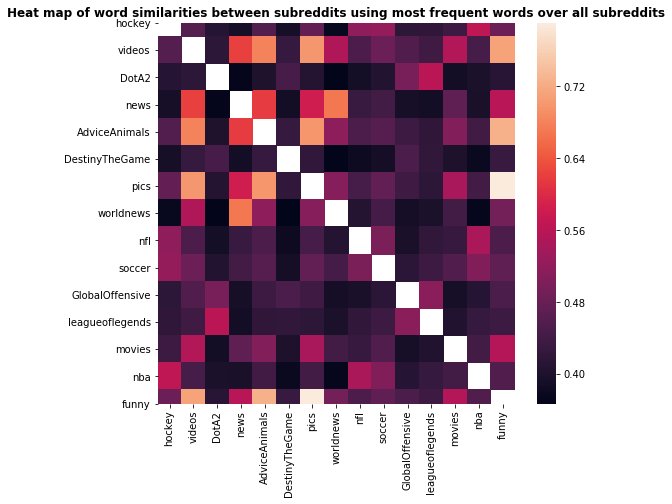

In [120]:
plt.figure(figsize=(8,7))
ax = sns.heatmap(topSubWords_df).set_title('Heat map of word similarities between subreddits using most frequent words over all subreddits', weight='bold')

#### Analysis

The previous plots presents a heatmap of the Jaccard similarity for all the 15 subreddits.

Observing the the plot, we can conclude there can be a relationship that connects the related subreddits with high Jaccard similarity.

For instance:

- Subreddit *funny* has a high similarity with *videos*, *news*, *AdviceAnimals*, *pics* and *worldnews*. This especially makes sense for *videos* and *pics*. *AdviceAnimals* is a subreddit dedicated to memes. Memes are meant to be funny. And one could argue that many of the news that go viral on Reddit are not always the most series ones. 

- The subreddit on *GlobalOffensive* stands out because it has low similarities with all the other subreddits. However, we can see it has slightly higher scores with *leagueoflegends* and *dota2*. All these 3 subreddits are dedicated to videogames and there we can find a connection

- On the other hand, this model fails to capture the obvious relationship there should be between the subreddits: *nba*, *soccer*, *nfl* and *hockey*. All of them are related to sports. However, there is not an increased similarity score between them. 


Thus, we can conclude that Jaccard similarity is able to capture some of the relationships between subreddits but not all of them. The main problem wihth this approach is the use of the most popular words. We are comparing the most common words in the communities. And people tend to use the same words over and over. In fact, according to [1], the first 2000 most common words in English can cover nearly 90% of the words covered in a conversation or 87% of fiction books. Therefore, it is the low-frequency words that define the topics of texts and conversations. And in this method we are discarding precisely the low-frequency words. For it to get better, we would need to include as many words as possible.


[1]. *Unknown Vocabulary Density and Reading Comprehension.*, Hsueh-Chao et al. Reading in a Foreign Language, v13 n1 p403-30 2000

### B2.3.

* Alternatively, compute the 1000 most frequent words for each subreddit, construct its representation as the set of top-1000 words, and print a heatmap with the Jaccard similarity like in step **B2.2.**.
* Explain your observations in detail: how and why is this new result different from the one obtained in **B2.2.**?

*Note: Use the same rules specified in B2.1: words tokenized with the regex \W and stop-words removed*

First, we need to compute the top-1000 words for each subreddit. 

To do so, we create a row for each filtered word in the comments and attach a column filled with 1's. This will allow us to group by 'subreddit' and 'word' and sum the number of appearances. 

In [98]:
mostFrequent_subReddit = noStopWords.select("subreddit",explode("filtered").alias("words"),  )
mostFrequent_subReddit = mostFrequent_subReddit.withColumn("counter", lit(1))

In [99]:
mostFrequent_subReddit = mostFrequent_subReddit.groupBy(["subreddit", mostFrequent_subReddit.words]).agg( sum("counter").alias("counter") )
mostFrequent_subReddit.show(10)

+---------------+---------+-------+
|      subreddit|    words|counter|
+---------------+---------+-------+
|         videos|forebears|      2|
|         videos|    riots|    442|
|         videos|     sure|  13973|
|           news| sleeping|    375|
|          DotA2|   modify|     45|
|leagueoflegends|     gold|  17398|
|         movies|   coming|   2939|
|leagueoflegends|     case|   9027|
|leagueoflegends|    offer|   1676|
|  AdviceAnimals|      big|   5553|
+---------------+---------+-------+
only showing top 10 rows



In the table above, columne '_counter_' contains the number of occurences of a word in a subreddit. Now, we make use of partitition to order the number of occurrences in each subreddit and select only top 1000 words.

In [100]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col

window = Window.partitionBy(mostFrequent_subReddit['subreddit']).orderBy(mostFrequent_subReddit['counter'].desc())

In [101]:
mostFrequent1K  = mostFrequent_subReddit.select('*', rank().over(window).alias('rank')).filter(col('rank') <= 1000) 
mostFrequent1K.show(5)

+---------+-----+-------+----+
|subreddit|words|counter|rank|
+---------+-----+-------+----+
|   hockey| like|  33899|   1|
|   hockey| game|  32360|   2|
|   hockey|  com|  24312|   3|
|   hockey| team|  24072|   4|
|   hockey|  one|  22892|   5|
+---------+-----+-------+----+
only showing top 5 rows



Below, we can observe that some subreddits contain more than 1000 words because there were more than 1 word with the 1000 occurrences. 

In [102]:
mostFrequent1K.groupBy("subreddit").agg(count("*").alias("cnt")).show(5)

+-------------+----+
|    subreddit| cnt|
+-------------+----+
|       hockey|1000|
|       videos|1002|
|        DotA2|1000|
|         news|1000|
|AdviceAnimals|1002|
+-------------+----+
only showing top 5 rows



Then we can create a list of the top 1000 words for each subreddit. We only need to group the words by subreddit and collect the list.

In [103]:
subReddit1KTexts = mostFrequent1K.groupBy("subreddit").agg(collect_list("words").alias("words"))
subReddit1KTexts.show(5)

+-------------+--------------------+
|    subreddit|               words|
+-------------+--------------------+
|       hockey|[like, game, com,...|
|       videos|[like, r, videos,...|
|        DotA2|[like, game, get,...|
|         news|[people, like, ge...|
|AdviceAnimals|[like, people, ge...|
+-------------+--------------------+
only showing top 5 rows



Finally, we are ready to compute the Jaccard similarity between al the subreddits and plot the results as a heatmap.

Similarly, to the previous plot we remove from the table the values where the same subreddit is being compared. 

In [104]:
topSubWords = subReddit1KTexts.collect()

In [105]:
jaccardScores = []
names = []
for i in range(len(topSubWords)):
    row = []
    names.append(topSubWords[i][0])
    for j in range(len(topSubWords)):
        jaccard = jaccard_similarity(topSubWords[i][1],topSubWords[j][1])
        
        if i == j:
            # Remove when compared to the same subreddit
            jaccard = np.nan
        
        row.append(jaccard)
    jaccardScores.append(row)
        

In [106]:
topSubWords_df = pd.DataFrame(jaccardScores, columns=names, index=names)

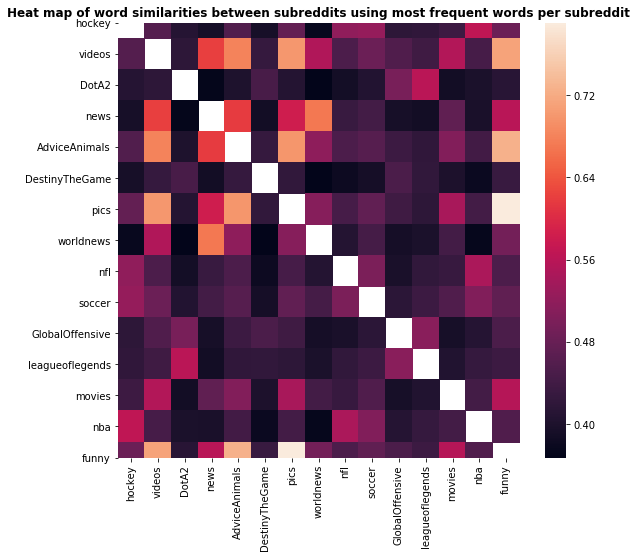

In [122]:
plt.figure(figsize=(9,8))
ax = sns.heatmap(topSubWords_df).set_title('Heat map of word similarities between subreddits using most frequent words per subreddit', weight='bold')

#### Analysis

In this case, we have created a set of the 1000-top words different for each subreddit. Compared to the previous approach, this new method is more likely to capture specific words that used a lot of times within a subreddit but not overall all subreddits. For instance, not all subreddits have the same amount of messages and mean message length. Therefore, the previous approach would take more words from the top commented subreddits. While the approach created in B2.3 with 1000-top words per subreddit has a different model for each subreddit. 

We can see this last approach captures better the relationship between subreddits based on the topic. It gives higher scores to related topics.

For instance, '_nba_' is now related to '_nfl_', '_hockey_' and slightly to '_soccer_'. A similar output can been seen with '_nfl_'.

Overall, we can conclude this approach captures better the topic relationship between subreddits.


## B3. Moderator assignment based on Subreddit Users

Subreddits can be seen as communities of people interacting about a common topic. As an alternative to the *textual content* based similarity in **B2**, your task here is to validate if similarity between two subreddits can be measured based on their participating users.

Of course users are not monothematic, and they interact with multiple subreddits. In this task, we are specifically interested in observing the amount of overlap across different subreddits based on their participating users. Similar to **B2**, the overlap is measured using the *Jaccard similarity*.


### B3.1.
Construct a set representation of each subreddit as the users that posted at least one time in that subreddit.

Some users are very talkative and active across different topics. Print the username of the person that posted in the maximum number of subreddits. *Note that users who posted at least once in a subreddit are considered as participant of that subreddit.*

In [108]:
# Group by subreddit and get the unique set of authors for each of them.
author_set_per_subreddit_spark = messages_df.groupby("subreddit").agg(collect_set("author").alias("authors_list"))

In [109]:
# Explode the author set and get the author that posts in the maximum number of subreddits
exploded_authors = author_set_per_subreddit_spark.select(explode("authors_list").alias("single_author"))
exploded_authors = exploded_authors.withColumn("counter", lit(1))
exploded_authors = exploded_authors.groupBy("single_author").agg(sum("counter").alias("counter"))
exploded_authors = exploded_authors.sort(desc("counter"))
exploded_authors.show(1)

+-------------+-------+
|single_author|counter|
+-------------+-------+
|      whispen|     15|
+-------------+-------+
only showing top 1 row



Whispen is the username of the user who posted on the maximum number of subreddits (15 different subreddtis).

### B3.2.

* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B3.1.**, and visualise it similar to **B2**.
* Analyze this plot, identify highly similar pairs of subreddits, and clearly describe your observations.

We create all the possible pairs of subreddits and loop over them to compute the jaccard_similarities

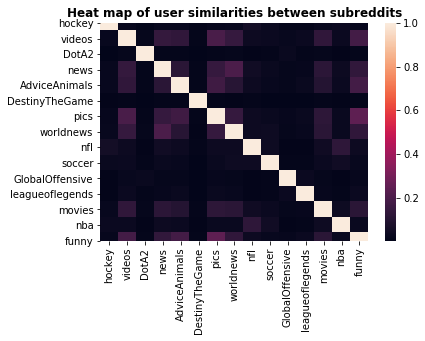

In [123]:
# Plot the heatmap for similarities betwee￼n
from itertools import combinations_with_replacement

# Get the set to python list, create dictionary and get pairs to calculate similarity on them
set_per_subreddit_list = author_set_per_subreddit_spark.collect()
set_per_subreddit_dict = dict(set_per_subreddit_list)
set_keys_pairs = combinations_with_replacement(set_per_subreddit_dict.keys(), r=2)

# Create a dictionary for similarities and fill it with empty dictionaries
jaccard_similarites = {}
[jaccard_similarites.update({key: {}}) for key in set_per_subreddit_dict.keys()]

# loop on pairs and calculate similarity between them
for subreddit1, subreddit2 in set_keys_pairs:
    similarity = jaccard_similarity(set_per_subreddit_dict[subreddit1], set_per_subreddit_dict[subreddit2])
    jaccard_similarites[subreddit1].update({subreddit2: similarity})
    jaccard_similarites[subreddit2].update({subreddit1: similarity})
    
jaccard_similarites_df = pd.DataFrame(jaccard_similarites)

jaccard_similarites_df.head()
ax = sns.heatmap(jaccard_similarites_df).set_title('Heat map of user similarities between subreddits', weight='bold')

Here the heat map is not clear as it skewed due to the 1.0 similarity of each subreddit with itself to get a clearer look we just remove these values.

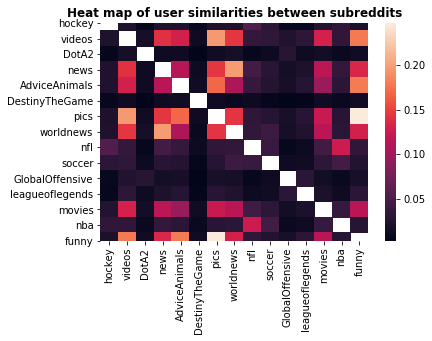

In [124]:
for key in jaccard_similarites.keys():
    jaccard_similarites_df.xs(key)[key] = np.nan

ax = sns.heatmap(jaccard_similarites_df).set_title('Heat map of user similarities between subreddits', weight='bold')

#### Analysis

The previous plots presents a heatmap of the Jaccard similarity for all the 15 subreddits according to active users

Observing the the plot, we can conclude there can be a relationship that connects the related subreddits with high Jaccard similarity compared to the others values.

There are some differences compared to the last plot but the relative trends remain the same:

- Subreddit *funny* has a high similarity with *videos*, *news*, *AdviceAnimals*, *pics* and *worldnews*. This especially makes sense for *videos* and *pics*. *AdviceAnimals* is a subreddit dedicated to memes. Memes are meant to be funny. And one could argue that many of the news that go viral on Reddit are not always the most series ones. 

- The subreddit on *GlobalOffensive* stands out because it has low similarities with all the other subreddits. However, we can see it has slightly higher scores with *leagueoflegends* and *dota2*. All these 3 subreddits are dedicated to videogames and there we can find a connection.



## B4. Language vs. Users similarity
    
* Visualize the similarity scores based on word (**B2.3.**) and user (**B3**) similarity on the x and y axes respectively for the subreddit `NBA` compared to all the other subreddits. Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
* Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!

In [112]:
# Construct a data frame for nba word similarity and user similarity with other subreddits
word_similarity = topSubWords_df['nba']
user_similarity = jaccard_similarites_df['nba']

nba_similarity_df = pd.concat([word_similarity, user_similarity], axis=1)
nba_similarity_df.columns = ['word_similarity', 'user_similarity']

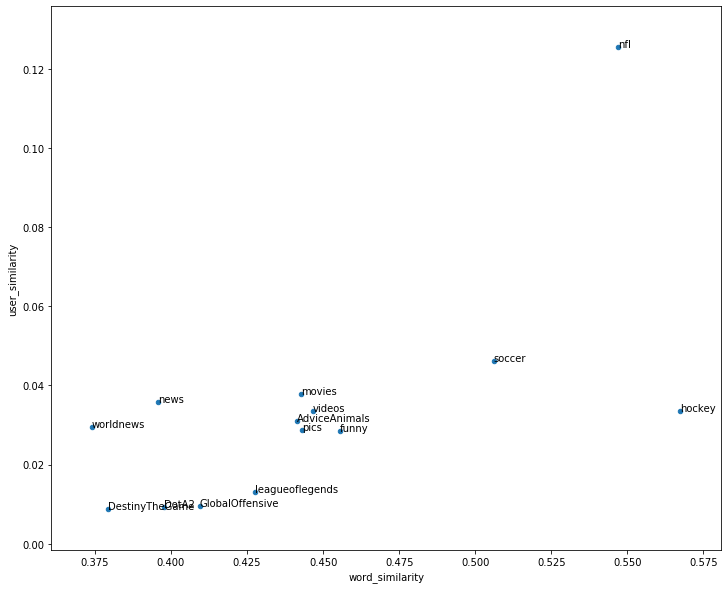

In [117]:
# Plot scatter plot for similarities
nba_similarity_df.plot.scatter(x='word_similarity', y='user_similarity', figsize=(12,10))
plt.xlabel()

for i, subreddit in enumerate(nba_similarity_df.index):
    if subreddit == "nba":
        continue
    plt.text(x=nba_similarity_df.iloc[i][0], y=nba_similarity_df.iloc[i][1], s=subreddit)

#### Analysis

The plot shows some semantically meaningful groups of levels of similarities with the nba subreddits:
- The sports subreddits seem to have the highest level of similarities with nba though not consistent between both similarity metrics.
- The entertaiment related subreddits appears to be clustered in the middle.
- Two more clusters appear with low levels of similarity with nba one representing news subreddits and the other represents games subreddits.


In [114]:
# Isolate sports related subreddits
word_similarity_sports = topSubWords_df[['hockey', 'nfl', 'soccer', 'nba']].loc[['hockey', 'nfl', 'soccer', 'nba']]
user_similarity_sports = jaccard_similarites_df[['hockey', 'nfl', 'soccer', 'nba']].loc[['hockey', 'nfl', 'soccer', 'nba']]

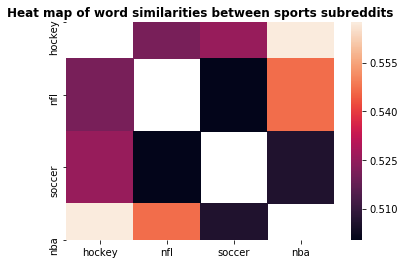

In [126]:
# Plot seperate word similarity for sports subreddits
ax = sns.heatmap(word_similarity_sports).set_title('Heat map of word similarities between sports subreddits', weight='bold')

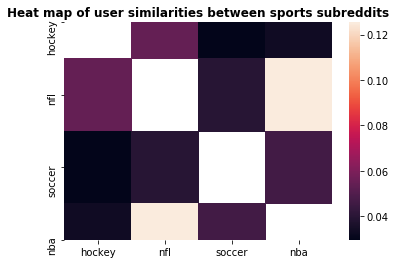

In [125]:
# Plot seperate user similarity for sports subreddits
ay = sns.heatmap(user_similarity_sports).set_title('Heat map of user similarities between sports subreddits', weight='bold')

#### Analysis

The previous two heatmaps show the word and user similarities between sports subreddits, and we can observe some patterns in them:

- NBA and NFL seem to have higher level of similarities compared to the rest on average which is very predictable with both being popular in the United States and 54% of reddit users are from the United States.
- Hockey seems to have very high word similarity with NBA.
- Hockey and NFL seem to have a reasonable average of similarity may be because both are popular in Canada.